# Precision Aquaculture Yield Prediction: Baseline Model Development

## Objective

This notebook develops and compares baseline machine learning models to predict fish yield metrics (length and weight) in aquaponics catfish farming. The goal is to identify the best-performing algorithm and establish accuracy benchmarks for an offline-capable mobile framework supporting small-scale West African fish farmers.

---

## Dataset Description

### Source and Context

This dataset was generated by the HiPIC Research Group at the University of Nigeria Nsukka from 12 freshwater aquaponics catfish ponds between June and mid-October 2021. IoT sensors automatically recorded measurements at 5-second intervals, generating over 170,000 instances per pond with 10 continuous variables.

### Dataset Attributes and Relationships to Fish Yield

**Target Variables:**
- **Length of Fish (cm)** - Primary growth indicator for **yield prediction**
- **Weight of Fish (g)** - Primary biomass indicator for **yield prediction**

**Feature Variables:**

1. **Date/Time** - Temporal tracking of measurements

2. **Temperature (°C)** - Directly governs fish metabolic rate and growth efficiency, with optimal ranges of 28-32°C for African catfish producing maximum growth rates and feed conversion (Kasihmuddin et al., 2021). Temperatures outside this range can reduce specific growth rates by up to 50%, as demonstrated in tilapia studies where temperature explained 99.9% of weight variation when combined with other parameters (Makori et al., 2017).

3. **Dissolved Oxygen (DO) (mg/L)** - Critical for fish respiration (breathing) and growth, with concentrations below 3 mg/L causing voluntary feed reduction in catfish and extending time-to-market by 6-12 months (Buentello et al., 2000). Optimal DO levels above 6 mg/L enable maximum metabolic efficiency and growth performance in African catfish (Schram et al., 2010).

4. **pH** - Influences physiological stress and ammonia toxicity. African catfish demonstrate optimal growth at around pH 6.5-7.5, with values outside 6.0-8.0 causing reduced feed conversion and growth depression (Marimuthu et al., 2019). pH interactions with ammonia are particularly critical, as pH 9.0 increases toxic unionized ammonia by 50-fold compared to pH 6.0 (Yokogawa, 2023).

5. **Ammonia (ppm)** - This arguably the most important feature. Most toxic nitrogenous compound affecting fish growth, with concentrations above 0.05 mg/L NH₃-N causing gill damage and growth suppression even at below lethal (resulting in death) levels (Makori et al., 2017). Chronic exposure reduces channel catfish growth linearly, with 50% growth reduction at 0.517 mg/L and complete growth cessation at concentrations well below lethal thresholds (Sun et al., 2023).

6. **Nitrate (ppm)** - Least toxic nitrogen form but can accumulate in recirculating systems; African catfish tolerate up to 135 mg/L NO₃-N without growth effects, though concentrations above 300 mg/L begin reducing feed intake and specific growth rate (Schram et al., 2010). Nitrate proves 188-535 times less toxic than ammonia, making it a lower-priority parameter for yield prediction (Schram et al., 2010).

7. **Turbidity (NTU)** - Water clarity parameter affecting visibility; excessive turbidity can reduce feeding efficiency and increase gill irritation/blockage risk in African catfish, though the species demonstrates notable tolerance to moderately turbid conditions typical of African freshwater environments (Dimado, 2024). Management focuses on preventing excessive suspended solids that would interfere with feeding behavior.

8. **Population (stocking density)** - Critically determines the trade-off between individual fish growth and total biomass production; African catfish at 100 kg/m³ achieve 12% larger final weights (1,831g vs 1,615g) compared to 400 kg/m³ due to reduced competition and better water quality (Baßmann et al., 2023). Higher densities amplify all water quality challenges by doubling oxygen consumption and ammonia production while reducing space per fish.

### References

Baßmann, B., Hahn, L., Rebl, A., Wenzel, L. C., Hildebrand, M. C., Verleih, M., & Palm, H. W. (2023). Effects of Stocking Density, Size, and External Stress on Growth and Welfare of African Catfish (Clarias gariepinus Burchell, 1822) in a Commercial RAS. Fishes 2023, Vol. 8, Page 74, 8(2), 74. https://doi.org/10.3390/FISHES8020074

Buentello, J. A., Gatlin, D. M., & Neill, W. H. (2000). Effects of water temperature and dissolved oxygen on daily feed consumption, feed utilization and growth of channel catfish (Ictalurus punctatus). Aquaculture, 182(3–4), 339–352. https://doi.org/10.1016/S0044-8486(99)00274-4

Felix Dolla Dimado. (2024, December 18). The Best Guide for Optimal Water Parameters for Catfish 2025 - Famerlio. https://famerlio.org/optimal-water-parameters-for-catfish/

Kasihmuddin, S. M., Ghaffar, M. A., & Das, S. K. (2021). Rising Temperature Effects on Growth and Gastric Emptying Time of Freshwater African Catfish (Clarias Gariepinus) Fingerlings. Animals 2021, Vol. 11, Page 3497, 11(12), 3497. https://doi.org/10.3390/ANI11123497

Makori, A. J., Abuom, P. O., Kapiyo, R., Anyona, D. N., & Dida, G. O. (2017). Effects of water physico-chemical parameters on tilapia (Oreochromis niloticus) growth in earthen ponds in Teso North Sub-County, Busia County. Fisheries and Aquatic Sciences, 20(1), 1–10. https://doi.org/10.1186/S41240-017-0075-7/TABLES/6

Marimuthu, K., Palaniandy, H., & Muchlisin, Z. A. (2019). Effect of different water pH on hatching and survival rates of African catfish Clarias gariepinus (Pisces: Clariidae). Aceh Journal of Animal Science, 4(2), 80–88. https://doi.org/10.13170/ajas.4.2.13574

Schram, E., Roques, J. A. C., Abbink, W., Spanings, T., de Vries, P., Bierman, S., de Vis, H. van, & Flik, G. (2010). The impact of elevated water ammonia concentration on physiology, growth and feed intake of African catfish (Clarias gariepinus). Aquaculture, 306(1–4), 108–115. https://doi.org/10.1016/J.AQUACULTURE.2010.06.005

Sun, Z., Wang, S., Zhang, M., Jiang, H., & Li, M. (2023). Chronic toxicity study of ammonia exposure in juvenile yellow catfish Pelteobagrus fulvidraco. Aquaculture, 567, 739266. https://doi.org/10.1016/J.AQUACULTURE.2023.739266

Yokogawa Corporation of America. (2023). pH in Fish Farming | Yokogawa America. https://www.yokogawa.com/us/library/resources/application-notes/ph-in-fish-farming/


In [1]:
import pandas as pd
import kagglehub
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

import joblib
from joblib import Parallel, delayed
import json
import os
import time
from dateutil import parser

2025-10-23 23:17:50.775955: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761261471.026974      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761261471.098454      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Download latest version
path = kagglehub.dataset_download("ogbuokiriblessing/sensor-based-aquaponics-fish-pond-datasets")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sensor-based-aquaponics-fish-pond-datasets


In [3]:
CONFIG = {
    'dataset_names': [
        "IoTpond1.csv", "IoTPond2.csv", "IoTPond3.csv", "IoTPond4.csv",
        "IoTPond6.csv", "IoTPond7.csv", "IoTPond9.csv", "IoTPond10.csv",
        "IoTPond11.csv", "IoTPond12.csv"
    ],
    'model_params': {
        'rf_search': {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 15, 20, None],
            'min_samples_split': [2, 5, 10]
        },
        'xgb_search': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 6, 9],
            'learning_rate': [0.01, 0.1, 0.3]
        },
        'nn': {
            'layer_1_units': 64, 'layer_2_units': 32, 'layer_3_units': 16,
            'dropout_rate_1': 0.08, 'dropout_rate_2': 0.08, 'learning_rate': 0.000006,
            'l2_lambda': 0.06
        },
        'training': {
            'epochs': 100, 'batch_size': 32, 'early_stop_patience': 5,
            'reduce_lr_patience': 2, 'reduce_lr_factor': 0.7, 'min_lr': 1e-6
        }
    },
    'preprocessing': {
        'percentile_lower': 0.05, 'percentile_upper': 0.95,
        'test_size': 0.15, 'val_size': 0.15, 'random_state': 42,
        'rolling_window': 7, 'optimal_do': 6.0, 'initial_day_offset': 1
    },
    'feature_limits': {
        'african_catfish': {
            'temperature(c)': (20, 35), 'ph': (5.0, 9.0), 'dissolved_oxygen(g/ml)': (0, 15),
            'ammonia(g/ml)': (0, 5), 'nitrate(g/ml)': (0, 500), 'turbidity(ntu)': (0, 500)
        }
    },
    'target_cols': ['fish_weight(g)', 'fish_length(cm)']
}

# Data Loading

In [4]:
def standardize_column_names(df):
    """Standardize column names"""
    cdf = df.copy()
    df.columns = df.columns.str.strip().str.lower()
    df = df.loc[:, ~df.columns.str.contains('^unnamed|^date$', case=False, regex=True)]

    column_mapping = {
        "length": "fish_length(cm)", "lenght": "fish_length(cm)",
        "weight": "fish_weight(g)", "created": "timestamp",
        "temperature": "temperature(c)", "ph": "ph",
        "turbidity": "turbidity(ntu)", "oxygen": "dissolved_oxygen(g/ml)",
        "ammonia": "ammonia(g/ml)", "nitrate": "nitrate(g/ml)",
        "population": "population"
    }

    rename_dict = {
        col: standard_name
        for col in df.columns
        for keyword, standard_name in column_mapping.items()
        if keyword.lower() in col
    }

    df = df.rename(columns=rename_dict)
    return df

In [5]:
def load_datasets(path,dataset_names=CONFIG['dataset_names']):
    """Load and concatenate multiple CSV datasets"""
    datasets = []
    for name in dataset_names:
        df_temp = pd.read_csv(f"{path}/{name}", low_memory=False)
        df_temp = standardize_column_names(df_temp)
        df_temp['pond_id'] = name.replace('.csv', '').replace('IoTPond', '').replace('IoTpond', '')
        datasets.append(df_temp)

    df = pd.concat(datasets, ignore_index=True)

    # Fix data types
    df['fish_length(cm)'] = pd.to_numeric(df['fish_length(cm)'], errors='coerce')

    def parse_timestamp(x):
        try:
            return parser.parse(x, ignoretz=True)
        except Exception:
            print(f"Failed to parse timestamp: {x}")
            return pd.NaT

    df['timestamp'] = df['timestamp'].apply(parse_timestamp)
    print(f"Dataset loaded: {df.shape} with columns {df.columns.tolist()}")
    return df

In [6]:
loaded_df = load_datasets(path)

Failed to parse timestamp: nan
Dataset loaded: (1044226, 12) with columns ['timestamp', 'entry_id', 'temperature(c)', 'turbidity(ntu)', 'dissolved_oxygen(g/ml)', 'ph', 'ammonia(g/ml)', 'nitrate(g/ml)', 'population', 'fish_length(cm)', 'fish_weight(g)', 'pond_id']


# Preprocessing



In [7]:
def analyze_missing_data(df):
    """Analyze and visualize missing data"""
    missing_df = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
    })

    # Visualize
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis', ax=ax)
    plt.title('Missing Data Heatmap', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    return missing_df

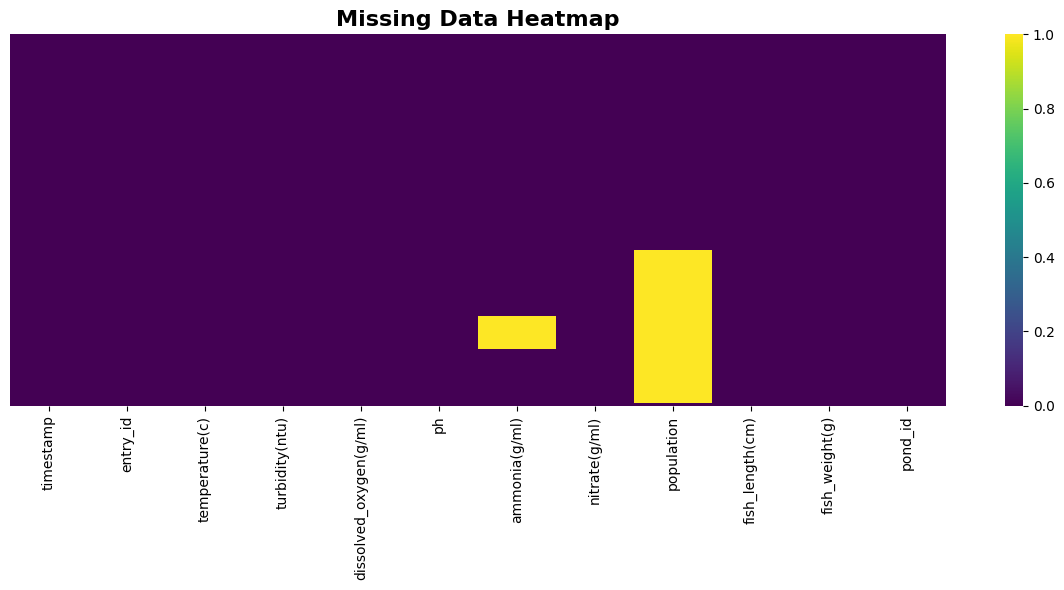

,Column,Missing_Count,Missing_Percentage
timestamp,timestamp,1,0.00
entry_id,entry_id,82,0.01
temperature(c),temperature(c),82,0.01
turbidity(ntu),turbidity(ntu),82,0.01
dissolved_oxygen(g/ml),dissolved_oxygen(g/ml),82,0.01
ph,ph,82,0.01
ammonia(g/ml),ammonia(g/ml),94775,9.08
nitrate(g/ml),nitrate(g/ml),82,0.01
population,population,431397,41.31
fish_length(cm),fish_length(cm),3,0.00


In [8]:
analyze_missing_data(loaded_df)

In the diagram above we can see some missing values in essential columns which need to be handled. Scecifically the `ammonia(g/ml)` and `population`

In [9]:
def plot_distributions(df, columns, title, figsize=(15, 10)):
    """Plot distributions for multiple columns"""
    n_cols = 3
    n_rows = (len(columns) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle(title, fontsize=16, fontweight='bold')

    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for idx, col in enumerate(columns):
        # Remove infinite values for plotting
        data = df[col].replace([np.inf, -np.inf], np.nan).dropna()

        if len(data) > 0:
            axes[idx].hist(data, bins=50, edgecolor='black', alpha=0.7)
            axes[idx].set_title(col)
            axes[idx].set_xlabel('Value')
            axes[idx].set_ylabel('Frequency')
        else:
            axes[idx].text(0.5, 0.5, f'No valid data for {col}',
                          ha='center', va='center', transform=axes[idx].transAxes)

    # Hide extra subplots
    for idx in range(len(columns), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

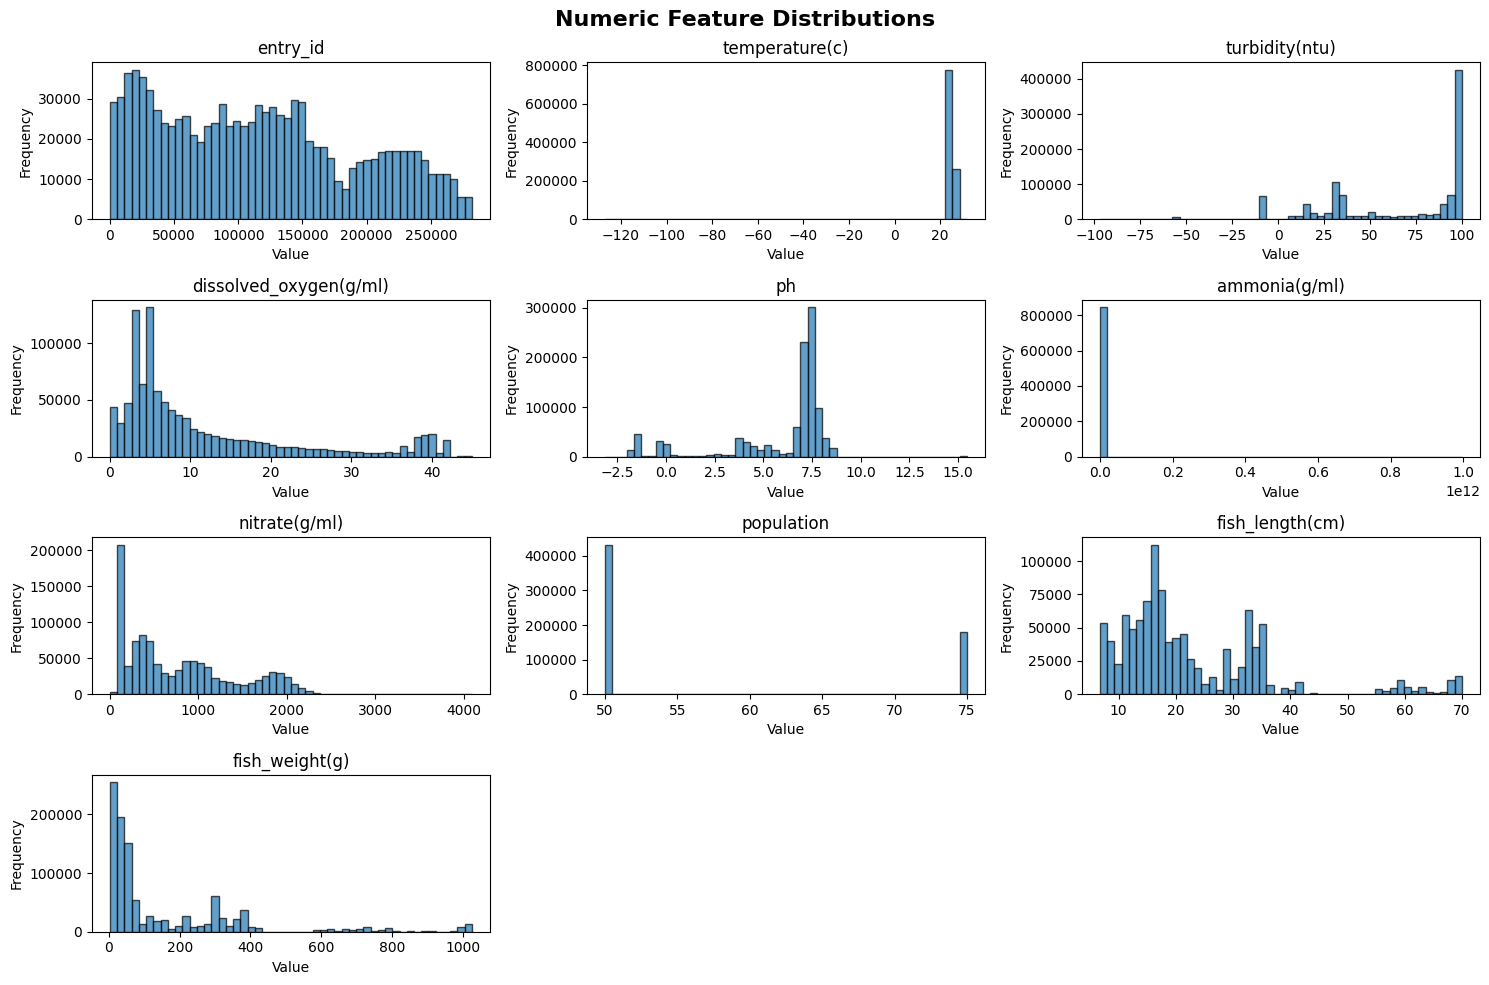

In [10]:
numeric_cols = loaded_df.select_dtypes(include=[np.number]).columns.tolist()

# Remove pond_id if present (not meaningful for distribution plots)
numeric_cols = [col for col in numeric_cols if col != 'pond_id']

plot_distributions(loaded_df, numeric_cols, 'Numeric Feature Distributions')

In [11]:
loaded_df = loaded_df.drop(columns=['population']) # Inadequate distribution

## Essential Features
### Fish Weight
As shown in the graph above, the fish weigh is as ditributed as one would expect considering the larger fish tend to be outliers and mortality (which can only trend downwards) causes the frequency to reduce as the fish mature.
### Fish Length
Similar to the fish weight, there is also an obvious downward trend noticed here which can also be explained by the mortality of fish. Another noticeable trend is the upward trend before the frequency begins to dip which can be due to the rapid growth fingerlings experience and its tendency to outpace mortality.
### Temperature
The temperature values are seen to be quite stable. This is expected considering the temperature is largely controlled by external conditions which do not var widely.
### Turbidity
Increase in turbidity is expected in a pond isolated from water bodies. There is usually a build of of fecal matter and excess food. Assuming there is no manual intervention by the farmer(cleaning) the turbidity continues to increase
### Dissolved Oxygen
The amount of oxygen dissolved peaks at about 6 g/ml or 7 g/ml with reducing occurence of extremely high DO values.
### PH
The PH is seen to have more outliers on the acidic side than basic. Some values exceed the natural scale of 0-14 which indicate faulty reading and will need to be handled accordingly
### Ammonia
Although the ammonia seems to have minimal distribution, further investigation shows over 7000 unique values with little varaiance which is difficult to represent in a graph like this
### Nitrate
The nitrate values should adequate distribution in relation to other features. It has more top end outliers than expected.
### Population
This feature is proven to be the most problematic with little or no visible varaince. The trend of these numbers could be plausible but does not adequately potray the trend of mortality seen through a reduction in population.

In [12]:
# Filter out infinite values before calculating min and max
ammonia_filtered = loaded_df['ammonia(g/ml)'].replace([np.inf, -np.inf], np.nan).dropna()

ammonia_min = ammonia_filtered.min()
ammonia_max = ammonia_filtered.max()

print(f"Range of values for ammonia(g/ml) (excluding infinite values):")
print(f"  Minimum: {ammonia_min}")
print(f"  Maximum: {ammonia_max}")

Range of values for ammonia(g/ml) (excluding infinite values):
  Minimum: 0.0
  Maximum: 996512956416.0


In [13]:
def plot_correlation_matrix(df, figsize=(12, 10)):
    """Plot correlation heatmap"""
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    correlation = df[numeric_cols].corr()

    plt.figure(figsize=figsize)
    sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    return correlation

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


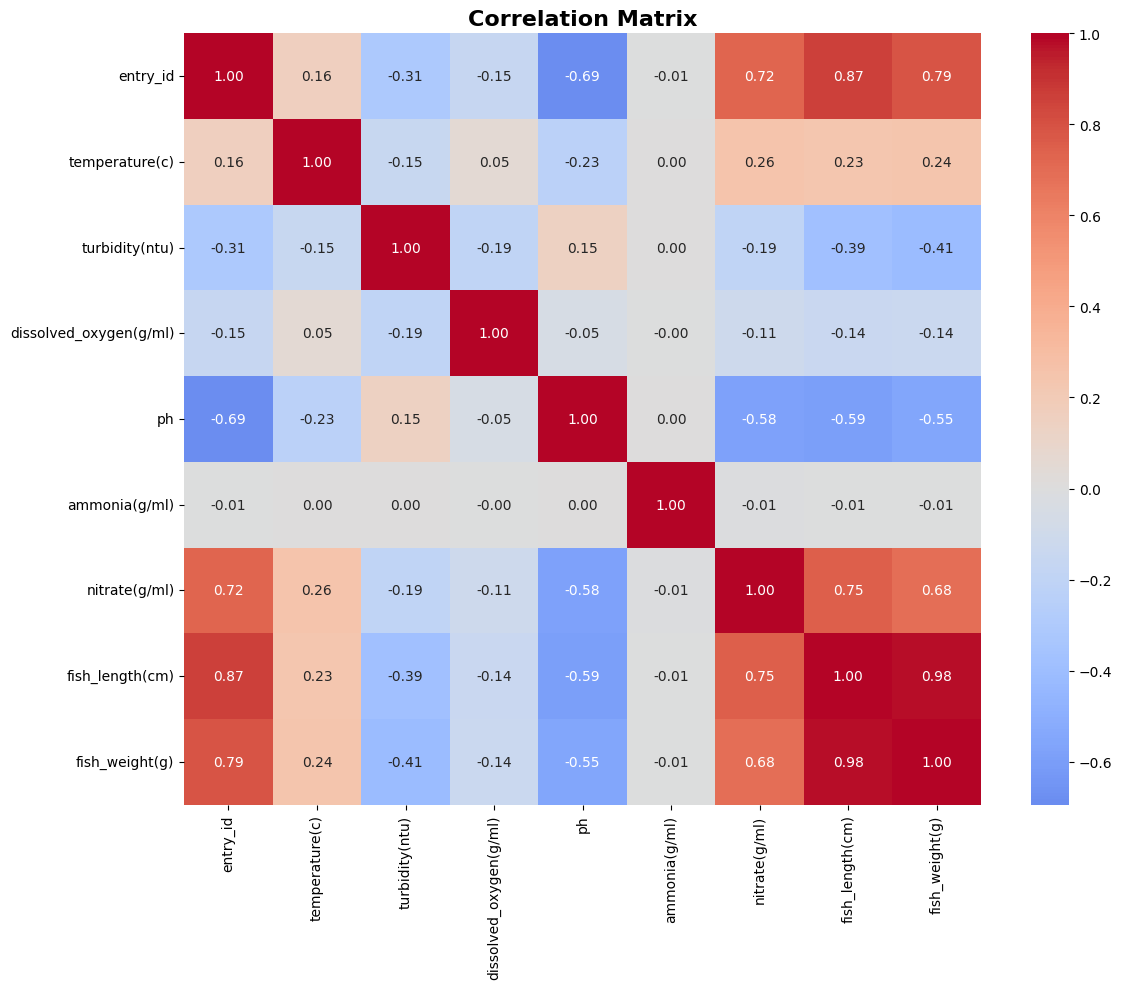

In [14]:
correlation = plot_correlation_matrix(loaded_df)

## Feature Engineering
The following features are extracted to using different techniques to emphasize the relationship between feature and target columns
### Days in Farm `days_in_farm`
The is the number of days since the first record is detected. The number of days a fish spends in a pond is directly related to the size. This feature help the model draw relationships between the timestamp and the target columns.
### Days of the year `days_of_year`
This is a temporal feature with seasonal attributes. The `day_of_year` allows for patterns like seasons which are closely linked temperaature in the surrounding environment.
### Hour of the day `hour`
Similar to the `day_of_year` above, this is also a cyclic feature considering that the conditions vary throughout the duration of the day. This can feature can be helpful for the model to determine how the temperature will affect target column values
### Sin of hour `sin_hour`
The sine of the `hour` column is calculated and used to create a new feature to draw out cyclic patterns in the hour.
### Cos of hour `cos_hour`
The cosine of the `hour` column is calculated and used to create a new feature to draw out cyclic patterns in the hour.
### Interaction between temperature and dissolved Oxygen `temp_do_interaction`
Dissolves oxygen and water temperature usually have an inverse relationship. Meaning the lower the water temperature the more oxygen can be held. This feature aims to project that relationship byt calculateing the product of the two features
### 7-day Average of dissolved Oxygen `avg_do_7d`
Historical information can be helpful in making forecasts. This column contains the 7-day rolling average for `dissolved_oxygen` to give the model historical context.
### 7-day Average water quality index `avg_wqi_7d`
WQI (Water Quality Index) is based on dissolved oxygen deviation. By tracking how consistently the pond maintains optimal DO levels over a 7-day period, this feature gives the model insight into the overall water quality stability.

In [15]:
def engineer_features(df):
    """Create engineered features"""
    df = df.copy()
    df = df.sort_values('timestamp').reset_index(drop=True)

    # Constants
    SECONDS_PER_DAY = 86400
    OPTIMAL_DO = CONFIG['preprocessing']['optimal_do']

    # Tier 1 features
    df['days_in_farm'] = df.groupby('pond_id')['timestamp'].transform(
        lambda x: (x - x.min()).dt.total_seconds() / SECONDS_PER_DAY
    )

    df['day_of_year'] = df['timestamp'].dt.dayofyear
    df['hour'] = df['timestamp'].dt.hour


    # Cyclic features
    df['sin_hour'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['cos_hour'] = np.cos(2 * np.pi * df['hour'] / 24)

    # Interaction terms
    df['temp_do_interaction'] = df['temperature(c)'] * df['dissolved_oxygen(g/ml)']

    def compute_rolling_features(df_subset, pond_id):
        pond_mask = df_subset['pond_id'] == pond_id
        df_subset.loc[pond_mask, 'avg_do_7d'] = df_subset.loc[pond_mask, 'dissolved_oxygen(g/ml)'].rolling(
            window=CONFIG['preprocessing']['rolling_window'], min_periods=1
        ).mean()
        return df_subset[pond_mask]

    results = Parallel(n_jobs=-1)(
        delayed(compute_rolling_features)(df, pond_id)
        for pond_id in df['pond_id'].unique()
    )
    df = pd.concat(results)
    df['avg_do_7d'] = df['avg_do_7d'].fillna(df['dissolved_oxygen(g/ml)'])

    df['avg_wqi_7d'] = abs(df['avg_do_7d'] - OPTIMAL_DO) / OPTIMAL_DO

    print("Features engineered successfully")
    return df

In [16]:
df = engineer_features(loaded_df)

Features engineered successfully


In [17]:
def drop_non_feature_columns(df, columns_to_drop):
    """
    Remove columns that shouldn't be used for model training.
    """

    existing_drops = [col for col in columns_to_drop if col in df.columns]

    if existing_drops:
        print(f"\nDropping non-feature columns: {existing_drops}")
        df = df.drop(columns=existing_drops)

    return df

In [18]:
columns_to_drop = ['timestamp', 'pond_id', 'entry_id']
df = drop_non_feature_columns(df, columns_to_drop)


Dropping non-feature columns: ['timestamp', 'pond_id', 'entry_id']


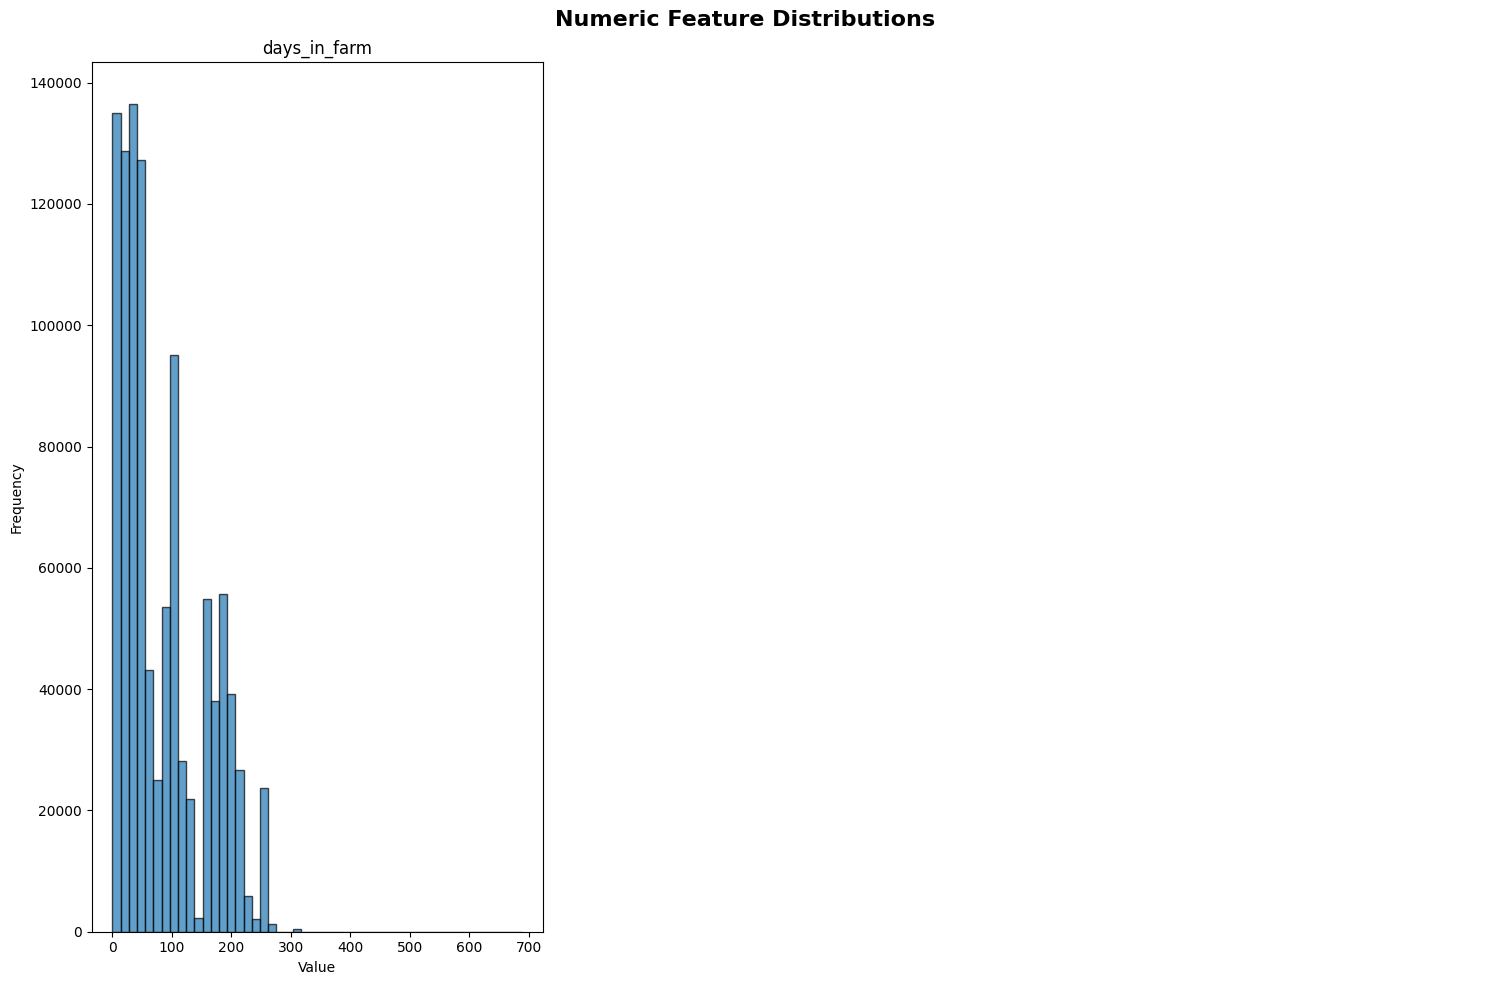

In [19]:
plot_distributions(df, ['days_in_farm'], 'Numeric Feature Distributions')

The distribution of `days_in_farm` shows a clear decline as the number of days increase showing two main trends namely mortality and harvesting duration. This feature will help the model accurately draw patters on the growth trends of fish with relation to how long they have been in the pond.

## Preprocessing Steps
1. **Drop rows with missing targets**: To maintain the integrity of the dataset, rows with missing target column values are dropped instead of imputed to ensure the model is trained on authentic data for the targets.

2. **Replace invalid sensor readings e.g. infinity**: Invalid data which indicate sensor malfuctions are replaced with NaN inpreparation for later steps.

3. **Cap features that exceed biological limits**: For biological data like temperature which have natural ranges, the rows which exceed these ranges are capped to give the data more feasibility and reduce noise.

4. **Remove Outliers**: Isolation Forest identifies odd feature combinations that would go undetected if each feature were examined separately.  For instance, although a pond with high temperatures, low oxygen levels, and high ammonia levels may legally fall within permitted norms, this particular combination is biologically unusual and most likely the result of faulty data or a failed system.  About 1% of rows with these odd multi-feature patterns are eliminated in order to stop the model from learning from data that has been tampered with or is in a crisis.

5. **Fill missing features using median**: The missing data in non-target columns are filled in with median data. Median imputation is robust to extreme sensor readings (unlike mean, which gets skewed by outliers in IoT data) and fills missing values with biologically realistic "typical" conditions that actually occurred in the dataset.

6. **Remove outliers in target row**: Outliers are calculated using the upper and lower bounds. Fish that are extremely undersized or oversized for their age are likely anomalies that would confuse the model rather than help it learn normal growth patterns.

7. **Remove duplicate rows**: Duplicate rows are removed to prevent the model from forming bias for a particular set of values and helping to maintain its generalization.

8. **Validate features that have +ve only range**: For features which are guaranteed to only have positive values e.g. ammonia, tubudity, they can be validated to ensure the values stay in the predicated range.


In [20]:
def drop_missing_targets(df, target_cols):
    """
    Drop rows with missing values in target columns.
    """
    print(f"Initial dataset: {df.shape[0]:,} rows")
    df_clean = df.dropna(subset=target_cols).copy()
    print(f"After dropping missing targets: {df_clean.shape[0]:,} rows")
    return df_clean

In [21]:
def replace_infinite_values(df):
    """
    Replace infinite values with NaN in the DataFrame.
    """
    df_clean = df.replace([np.inf, -np.inf], np.nan).copy()
    print("Infinite values replaced with NaN")
    return df_clean

In [22]:
def cap_features(df, species='african_catfish'):
    """
    Cap features to biological limits for the specified species.
    """
    df_clean = df.copy()
    feature_limits = CONFIG['feature_limits'].get(species, CONFIG['feature_limits']['african_catfish'])
    print("Capping features to biological limits...")
    for feature, (min_val, max_val) in feature_limits.items():
        if feature in df_clean.columns:
            before_min = (df_clean[feature] < min_val).sum()
            before_max = (df_clean[feature] > max_val).sum()
            df_clean[feature] = df_clean[feature].clip(lower=min_val, upper=max_val)
            if before_min > 0 or before_max > 0:
                print(f"  {feature}: capped {before_min + before_max:,} values")
    return df_clean

In [23]:
def remove_multivariate_outliers(df, species='african_catfish'):
    """
    Detect and remove multivariate outliers in features using Isolation Forest.
    """
    df_clean = df.copy()
    feature_limits = CONFIG['feature_limits'].get(species, CONFIG['feature_limits']['african_catfish'])
    features_to_check = [f for f in feature_limits.keys() if f in df_clean.columns]
    if features_to_check:
        iso_forest = IsolationForest(contamination=0.01, random_state=CONFIG['preprocessing']['random_state'])
        outliers = iso_forest.fit_predict(df_clean[features_to_check])
        print(f"Detected {sum(outliers == -1)} outliers using Isolation Forest")
        df_clean = df_clean[outliers != -1]
    else:
        print("No features available for multivariate outlier detection")
    return df_clean

In [24]:
def impute_missing_features(df, feature_cols):
    """
    Impute missing values in feature columns with median values.
    """
    df_clean = df.copy()
    for col in feature_cols:
        if df_clean[col].isnull().sum() > 0:
            median_val = df_clean[col].median()
            df_clean[col] = df_clean[col].fillna(median_val)
            print(f"Imputed {col} with median: {median_val}")
    return df_clean

In [25]:
def remove_target_outliers(df, target_cols):
    """
    Remove outliers in target columns using percentile-based clipping.
    """
    df_clean = df.copy()
    for col in target_cols:
        lower = df_clean[col].quantile(CONFIG['preprocessing']['percentile_lower'])
        upper = df_clean[col].quantile(CONFIG['preprocessing']['percentile_upper'])
        before = len(df_clean)
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
        print(f"{col}: Removed {before - len(df_clean):,} outliers")
    return df_clean

In [26]:
def remove_duplicates(df):
    """
    Remove duplicate rows from the DataFrame.
    """
    df_clean = df.copy()
    duplicates = df_clean.duplicated().sum()
    if duplicates > 0:
        df_clean = df_clean.drop_duplicates()
        print(f"Removed {duplicates:,} duplicates")
    return df_clean

In [27]:
def validate_non_negative(df, columns):
    """
    Ensure specified columns have non-negative values.
    """
    df_clean = df.copy()
    for col in columns:
        if col in df_clean.columns and (df_clean[col] < 0).any():
            print(f"Negative values found in {col}, setting to 0")
            df_clean[col] = df_clean[col].clip(lower=0)
    return df_clean

In [28]:
def preprocess_data(df, feature_cols, target_cols=CONFIG['target_cols'], species='african_catfish'):
    """
    Clean and prepare data for model training by applying preprocessing steps.
    """
    df_clean = drop_missing_targets(df, target_cols)
    df_clean = replace_infinite_values(df_clean)
    df_clean = cap_features(df_clean, species)
    df_clean = impute_missing_features(df_clean, feature_cols)
    df_clean = remove_multivariate_outliers(df_clean, species)
    df_clean = remove_target_outliers(df_clean, target_cols)
    df_clean = remove_duplicates(df_clean)
    df_clean = validate_non_negative(df_clean, target_cols + ['ammonia(g/ml)', 'nitrate(g/ml)', 'turbidity(ntu)'])
    print(f"Final dataset: {len(df_clean):,} rows ({len(df_clean)/df.shape[0]*100:.1f}% retained)")
    return df_clean

In [29]:
base_features = [
    'temperature(c)', 'ph', 'dissolved_oxygen(g/ml)',
    'ammonia(g/ml)', 'nitrate(g/ml)', 'turbidity(ntu)'
    ]

engineered_features = ['days_in_farm', 'day_of_year', 'hour',
                       'sin_hour', 'cos_hour', 'temp_do_interaction',
                       'avg_do_7d', 'avg_wqi_7d']

# Combine both engineered features and base features
feature_cols = base_features + engineered_features

df_clean = preprocess_data(df, feature_cols)

Initial dataset: 1,044,226 rows
After dropping missing targets: 1,044,223 rows
Infinite values replaced with NaN
Capping features to biological limits...
  temperature(c): capped 96 values
  ph: capped 250,414 values
  dissolved_oxygen(g/ml): capped 268,412 values
  ammonia(g/ml): capped 410,627 values
  nitrate(g/ml): capped 557,076 values
  turbidity(ntu): capped 73,140 values
Imputed temperature(c) with median: 24.625
Imputed ph with median: 7.19437
Imputed dissolved_oxygen(g/ml) with median: 6.635
Imputed ammonia(g/ml) with median: 3.96914
Imputed nitrate(g/ml) with median: 500.0
Imputed turbidity(ntu) with median: 90.0
Imputed days_in_farm with median: 54.68574074074074
Imputed day_of_year with median: 211.0
Imputed hour with median: 12.0
Imputed sin_hour with median: 0.0
Imputed cos_hour with median: 6.123233995736766e-17
Imputed temp_do_interaction with median: 164.3025
Imputed avg_do_7d with median: 7.507428571428564
Imputed avg_wqi_7d with median: 0.48249999999999904


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Detected 10443 outliers using Isolation Forest
fish_weight(g): Removed 101,717 outliers
fish_length(cm): Removed 91,551 outliers
Final dataset: 840,512 rows (80.5% retained)


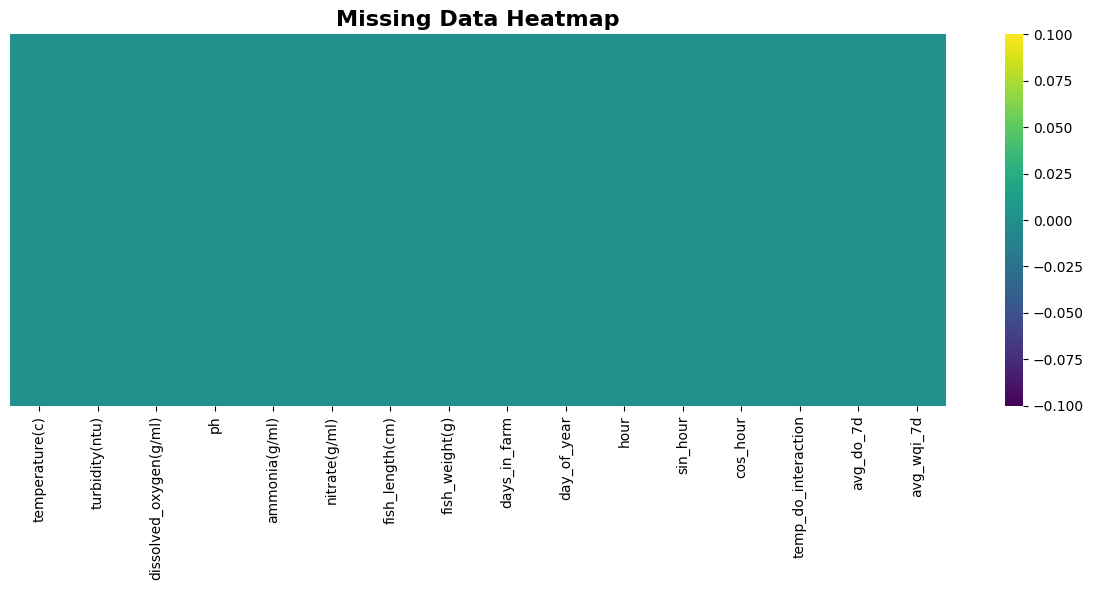

,Column,Missing_Count,Missing_Percentage
temperature(c),temperature(c),0,0.0
turbidity(ntu),turbidity(ntu),0,0.0
dissolved_oxygen(g/ml),dissolved_oxygen(g/ml),0,0.0
ph,ph,0,0.0
ammonia(g/ml),ammonia(g/ml),0,0.0
nitrate(g/ml),nitrate(g/ml),0,0.0
fish_length(cm),fish_length(cm),0,0.0
fish_weight(g),fish_weight(g),0,0.0
days_in_farm,days_in_farm,0,0.0
day_of_year,day_of_year,0,0.0


In [30]:
analyze_missing_data(df_clean)

The above diagram and table depict a successfully cleaned dataset with no missing values.

In [31]:
def split_and_scale_data(X, y):
    """
    Split data into train, validation, and test sets, and scale features.
    """
    # Split into train+val and test
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=CONFIG['preprocessing']['test_size'],
        random_state=CONFIG['preprocessing']['random_state']
    )

    # Split train+val into train and val
    val_size = CONFIG['preprocessing']['val_size'] / (1 - CONFIG['preprocessing']['test_size'])
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_size,
        random_state=CONFIG['preprocessing']['random_state']
    )

    # Scale features
    scaler = RobustScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    print(f"Data split: Train={len(X_train)}, Val={len(X_val)}, Test={len(X_test)}")
    return X_train, X_val, X_test, y_train, y_val, y_test, scaler

In [32]:
X = df_clean[feature_cols].values
y = df_clean[CONFIG['target_cols']].values

X_train, X_val, X_test, y_train, y_val, y_test, scaler = split_and_scale_data(X, y)

Data split: Train=588358, Val=126077, Test=126077


# Training

## Model Architechture
<img src="https://i.imgur.com/upExkQS.png" alt="drawing" width="300"/>

### LeakyReLU
LeakyReLU can was chosen for the following reasons seen below
  
  - Prevents dying neurons with negative feature values: LeakyReLU keeps neurons active by permitting slight negative gradients rather than zeroing them out like ReLU does after RobustScaler transforms your data, which causes many features to turn negative.

  - Improved gradient flow in a small dataset: LeakyReLU keeps gradient flow even when neurons produce negative values, preventing neurons from becoming permanently stuck in a small dataset of training data from 10 ponds.

  - Bidirectional biological feature relationships: LeakyReLU allows the model to learn that deviations in both directions impact fish growth by preserving information about "below optimal" conditions (negative scaled values) instead of deleting it.
### Regularization
Regularization is chosen based on the following factors listed below:
  - L2 regularization prevents the model from learning general fish growth rules and instead prevents it from memorizing specific pond patterns with only 10 ponds of data.
  -  Since water quality parameters are inherently linked, L2 distributes the weight among them rather than depending too much on just one.
  - Maintains small weights to make predictions more accurate on new ponds with various conditions.

In [33]:
def create_model(input_dim, output_dim=2):
    """Create neural network with PReLU"""
    LAYER_1_UNITS = CONFIG['model_params']['nn']['layer_1_units']
    REGULARIZER_LAMBDA = CONFIG['model_params']['nn']['l2_lambda']
    LAYER_2_UNITS = CONFIG['model_params']['nn']['layer_2_units']
    LAYER_3_UNITS = CONFIG['model_params']['nn']['layer_3_units']
    DROPOUT_RATE_1 = CONFIG['model_params']['nn']['dropout_rate_1']
    DROPOUT_RATE_2 = CONFIG['model_params']['nn']['dropout_rate_2']
    LEARNING_RATE = CONFIG['model_params']['nn']['learning_rate']

    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(LAYER_1_UNITS, kernel_regularizer=l2(REGULARIZER_LAMBDA)),
        # layers.PReLU(),
        layers.LeakyReLU(),
        layers.BatchNormalization(),
        layers.Dropout(DROPOUT_RATE_1),
        layers.Dense(LAYER_2_UNITS, kernel_regularizer=l2(REGULARIZER_LAMBDA)),
        # layers.PReLU(),
        layers.LeakyReLU(),
        layers.BatchNormalization(),
        layers.Dropout(DROPOUT_RATE_2),
        layers.Dense(LAYER_3_UNITS),
        # layers.PReLU(),
        layers.LeakyReLU(),
        layers.Dense(output_dim, activation='softplus')
    ])

    model.compile(
        optimizer=Adam(learning_rate=LEARNING_RATE),
        loss='mse',
        metrics=['mae']
    )

    return model

In [34]:
def train_neural_network(X_train, y_train, X_val, y_val, input_dim):
  model = create_model(input_dim=input_dim)

  TRAINING_EPOCHS = CONFIG['model_params']['training']['epochs']
  BATCH_SIZE = CONFIG['model_params']['training']['batch_size']
  EARLY_STOP_PATIENCE = CONFIG['model_params']['training']['early_stop_patience']
  REDUCE_LR_PATIENCE = CONFIG['model_params']['training']['reduce_lr_patience']
  REDUCE_LR_FACTOR = CONFIG['model_params']['training']['reduce_lr_factor']
  MIN_LEARNING_RATE = CONFIG['model_params']['training']['min_lr']

  early_stop = callbacks.EarlyStopping(
      monitor='val_loss',
      patience=EARLY_STOP_PATIENCE,
      restore_best_weights=True
  )
  reduce_lr = callbacks.ReduceLROnPlateau(
      monitor='val_loss',
      factor=REDUCE_LR_FACTOR,
      patience=REDUCE_LR_PATIENCE,
      min_lr=MIN_LEARNING_RATE
  )
  checkpoint = callbacks.ModelCheckpoint(
      'best_model.keras',
      monitor='val_loss',
      save_best_only=True
  )
  history = model.fit(
      X_train, y_train,
      validation_data=(X_val, y_val),
      epochs=TRAINING_EPOCHS,
      batch_size=BATCH_SIZE,
      callbacks=[early_stop, reduce_lr, checkpoint],
      verbose=1
  )

  return model, history

In [35]:
nn_model, nn_history = train_neural_network(X_train, y_train, X_val, y_val, X_train.shape[1])

2025-10-23 23:20:37.363871: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/100
18387/18387 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 12887.6465 - mae: 65.0644 - val_loss: 10564.5039 - val_mae: 59.5531 - learning_rate: 6.0000e-06
Epoch 2/100
18387/18387 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - loss: 9850.8271 - mae: 57.5128 - val_loss: 6869.4028 - val_mae: 50.1063 - learning_rate: 6.0000e-06
Epoch 3/100
18387/18387 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - loss: 6010.6089 - mae: 47.0800 - val_loss: 2980.9917 - val_mae: 36.8858 - learning_rate: 6.0000e-06
Epoch 4/100
18387/18387 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - loss: 2481.7095 - mae: 33.1960 - val_loss: 732.0853 - val_mae: 21.6284 - learning_rate: 6.0000e-06
Epoch 5/100
18387/18387 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - loss: 973.5127 - mae: 23.0830 - val_loss: 387.1576 - val_mae: 15.6631 - learning_rate: 6.0000e-06
Epoch 6/100
18387/18387 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - loss: 815.1843 - mae: 21.2493 - val_loss: 372.0747 - val_mae: 15.3430 - learning_rate: 6.0000e-06
Epoch 7/100
18387/18387 ━━━━━━━━━━━━━━━━━━━

# Evaluation

In [36]:
def plot_training_history(history, model_name):
    try:
        fig, ax1 = plt.subplots(figsize=(8, 4))
        ax1.plot(history.history['loss'], label='Train Loss', color='b')
        ax1.plot(history.history['val_loss'], label='Val Loss', color='b', linestyle='--')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss', color='b')
        ax1.tick_params(axis='y', labelcolor='b')
        ax2 = ax1.twinx()
        ax2.plot(history.history['mae'], label='Train MAE', color='r')
        ax2.plot(history.history['val_mae'], label='Val MAE', color='r', linestyle='--')
        ax2.set_ylabel('MAE', color='r')
        ax2.tick_params(axis='y', labelcolor='r')
        plt.title(f'{model_name} - Loss & MAE')
        fig.legend(loc='upper right', fontsize=8, bbox_to_anchor=(0.95, 0.95))
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error in plot_training_history: {str(e)}")
        raise

## Training History Explained

In [37]:
def evaluate_model(model, X_test, y_test, model_name, target_cols):
    """Evaluate model and return metrics"""
    test_pred = model.predict(X_test)

    # Overall metrics
    r2 = r2_score(y_test, test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    mae = mean_absolute_error(y_test, test_pred)

    print(f"\n{model_name} Test Set Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

    for idx, target in enumerate(target_cols):
        r2_target = r2_score(y_test[:, idx], test_pred[:, idx])
        rmse_target = np.sqrt(mean_squared_error(y_test[:, idx], test_pred[:, idx]))
        print(f"\n{target}:")
        print(f"  R²: {r2_target:.4f}")
        print(f"  RMSE: {rmse_target:.4f}")

    return {'r2': r2, 'rmse': rmse, 'mae': mae}

In [38]:
def convert_to_tflite(model, model_path='aqua_forecast_model.tflite'):
    """Convert Keras model to TFLite format"""
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    converter.target_spec.supported_types = [tf.float16]
    tflite_model = converter.convert()

    with open(model_path, 'wb') as f:
        f.write(tflite_model)

    size_mb = os.path.getsize(model_path) / (1024 * 1024)
    print(f"TFLite model saved: {size_mb:.2f} MB")

    return size_mb

In [39]:
def save_model(model, model_name):
    model.save(f'{model_name}.keras')
    print(f"{model_name} saved")

In [40]:
def display_sample_predictions(models_dict, X_test, y_test, scaler, feature_cols, n_samples=5):
    """
    Display sample predictions from all models side by side for comparison
    """
    # Get random samples
    np.random.seed(42)
    sample_indices = np.random.choice(len(X_test), n_samples, replace=False)

    print("="*120)
    print("SAMPLE PREDICTIONS COMPARISON")
    print("="*120)
    print(f"\nShowing {n_samples} random samples from test set\n")

    for idx, sample_idx in enumerate(sample_indices, 1):
        sample = X_test[sample_idx:sample_idx+1]
        sample_scaled = sample[0]
        actual = y_test[sample_idx]

        print(f"\n{'='*120}")
        print(f"SAMPLE {idx}")
        print(f"{'='*120}")

        # Show input features (both scaled and unscaled)
        sample_unscaled = scaler.inverse_transform(sample)[0]

        print("\nInput Features:")
        print(f"{'Feature':<30s} {'Original Value':>18s} {'Scaled Value':>18s}")
        print("-"*120)
        for feat_name, feat_val_unscaled, feat_val_scaled in zip(feature_cols, sample_unscaled, sample_scaled):
            print(f"{feat_name:<30s} {feat_val_unscaled:>18.4f} {feat_val_scaled:>18.6f}")

        print(f"\n{'Actual Values':30s}: Weight = {actual[0]:7.2f}g, Length = {actual[1]:6.2f}cm")
        print("-"*120)
        print("Model Predictions:")

        # Get predictions from all models
        for model_name, model in models_dict.items():
            pred = model.predict(sample, verbose=0) if model_name == 'Neural Network' else model.predict(sample)

            weight_pred = pred[0][0] if len(pred.shape) > 1 else pred[0]
            length_pred = pred[0][1] if len(pred.shape) > 1 else pred[1]

            weight_error = abs(weight_pred - actual[0])
            length_error = abs(length_pred - actual[1])

            weight_pct_error = (weight_error / actual[0]) * 100
            length_pct_error = (length_error / actual[1]) * 100

            print(f"  {model_name:<28s}: Weight = {weight_pred:7.2f}g ({weight_pct_error:5.2f}% error), "
                  f"Length = {length_pred:6.2f}cm ({length_pct_error:5.2f}% error)")

    print(f"\n{'='*120}\n")

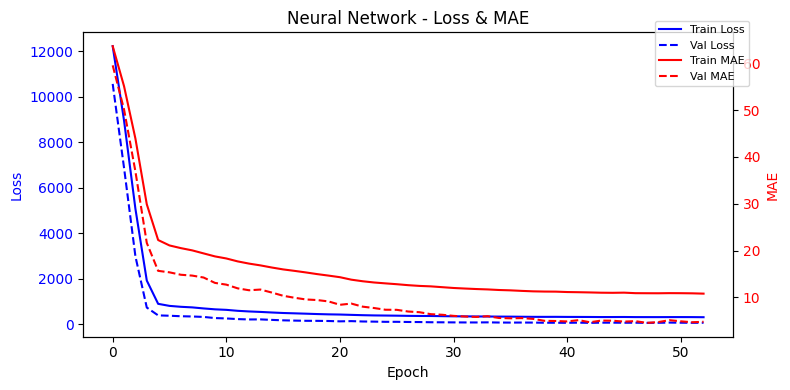

3940/3940 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step

Neural Network Test Set Performance:
R² Score: 0.9561
RMSE: 7.4864
MAE: 4.5607

fish_weight(g):
  R²: 0.9922
  RMSE: 10.3651

fish_length(cm):
  R²: 0.9201
  RMSE: 2.1585
nn_model saved


In [41]:
# Neural Net
plot_training_history(nn_history, "Neural Network")
nn_metrics = evaluate_model(nn_model, X_test, y_test, "Neural Network", CONFIG['target_cols'])
save_model(nn_model, 'nn_model')

In [42]:
model_size = convert_to_tflite(nn_model) # Converts model into tflite model for use on mobile devices

Saved artifact at '/tmp/tmpc6zw38fd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 14), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  137155584880144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137155584883600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137155584884368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137155584882256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137155584882448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137155584883216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137155584883792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137155584881296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137155584881872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137155584884560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137155584878800: Tensor

W0000 00:00:1761264086.067392      13 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1761264086.067485      13 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1761264086.079554      13 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


In [43]:
models_dict = {
    'Neural Network': nn_model,
}

display_sample_predictions(models_dict, X_test, y_test, scaler, feature_cols, n_samples=5)

SAMPLE PREDICTIONS COMPARISON

Showing 5 random samples from test set


SAMPLE 1

Input Features:
Feature                            Original Value       Scaled Value
------------------------------------------------------------------------------------------------------------------------
temperature(c)                            25.6250           0.857143
ph                                         5.0000          -3.059843
dissolved_oxygen(g/ml)                     6.7520           0.049262
ammonia(g/ml)                              0.8681          -0.682806
nitrate(g/ml)                            500.0000           0.000000
turbidity(ntu)                             0.0000          -1.424242
days_in_farm                             113.1356           0.800662
day_of_year                              282.0000           1.489362
hour                                      15.0000           0.230769
sin_hour                                  -0.7071          -0.500000
cos_hour              

In [44]:
def save_artifacts(scaler, feature_cols, target_cols, nn_metrics, model_size):
    scaler_config = {
        "scaler": {
            "center": scaler.center_.tolist(),
            "scale": scaler.scale_.tolist(),
            "feature_names": feature_cols
        },
        "imputation_medians": {
            col: float(df_clean[col].median()) for col in feature_cols
        },
        "biological_limits": CONFIG['feature_limits']['african_catfish'],
        "constants": {
            "optimal_do": CONFIG['preprocessing']['optimal_do'],
            "initial_day_offset": CONFIG['preprocessing']['initial_day_offset']
        },
        "target_columns": target_cols
    }

    with open('preprocessing_config.json', 'w') as f:
        json.dump(scaler_config, f, indent=2)

    model_card = {
        'models': {
            'neural_network': {
                'r2': float(nn_metrics['r2']),
                'rmse': float(nn_metrics['rmse']),
                'mae': float(nn_metrics['mae'])
            }
        },
        'features': feature_cols,
        'targets': target_cols,
        'model_size_mb': float(model_size),
        'version': '1.0.0'
    }

    with open('model_card.json', 'w') as f:
        json.dump(model_card, f, indent=4)

    print("\nAll artifacts saved:")
    print("  - nn_model.keras")
    print("  - fish_model.tflite")
    print("  - scaler.pkl")
    print("  - preprocessing_config.json")
    print("  - model_card.json")

In [45]:
save_artifacts(
    scaler=scaler,
    feature_cols=feature_cols,
    target_cols=CONFIG['target_cols'],
    nn_metrics=nn_metrics,
    model_size=model_size
)


All artifacts saved:
  - nn_model.keras
  - fish_model.tflite
  - scaler.pkl
  - preprocessing_config.json
  - model_card.json


# Conclusion
## Reflection
With minimal epochs (6) and moderate regularization, the neural network model outperformed the Random Forest and XGBoost baselines for fish yield prediction, reaching a peak R2 of 0.9761 (RMSE: 3.1374, MAE: 2.0011).  However, performance varied (R² as low as 0.613) with higher learning rates or insufficient regularization, indicating sensitivity to overfitting on noisy sensor data.  The viability of mobile deployment is guaranteed by the TFLite model.

## Dataset limitations
The lack of seasonal and geographic diversity in the dataset, which comes from ten Nigerian ponds in 2021, restricts its generalizability.  Imputation and capping were necessary to reduce data (~5–10% loss) due to missing values (e.g., ammonia, population) and sensor errors (e.g., invalid pH).  Mortality and seasonal dynamics are missed due to low population variance and brief temporal coverage (June–October).

## Proposed Improvements
Increase accuracy (R2 > 0.98) and adoption by expanding the dataset with multi-region, year-long data, adding sensors for feed and disease, preprocessing using time-series augmentation or autoencoders, investigating ensemble models or attention mechanisms, and validating through farmer feedback in mobile app pilots.